In [129]:
# needs to use the superraenn conda environ because of 
# version-specific dependencies with python
# (which is annoying)
import numpy as np
from matplotlib import pyplot as plt
import urllib
import os
import sys
from astropy.io import fits
from sklearn.model_selection import train_test_split
import pandas as pd
#import GCRCatalogs
from astropy.cosmology import Planck15 as P15
from astropy import units as u
import time 
import seaborn as sns
import pandas as pd
%matplotlib inline
import qp

In [130]:
sns.set_context("talk",font_scale=1.5)

sns.set_style('white', {'axes.linewidth': 0.5})
plt.rcParams['xtick.major.size'] = 15
plt.rcParams['ytick.major.size'] = 15

plt.rcParams['xtick.minor.size'] = 10
plt.rcParams['ytick.minor.size'] = 10
plt.rcParams['xtick.minor.width'] = 2
plt.rcParams['ytick.minor.width'] = 2

plt.rcParams['xtick.major.width'] = 2
plt.rcParams['ytick.major.width'] = 2
plt.rcParams['xtick.bottom'] = True
plt.rcParams['xtick.top'] = True
plt.rcParams['ytick.left'] = True
plt.rcParams['ytick.right'] = True

plt.rcParams['xtick.minor.visible'] = True
plt.rcParams['ytick.minor.visible'] = True
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'

plt.rcParams.update({
    "text.usetex": False,
    "font.family": "serif",
    "font.serif": ["Palatino"],
})

In [131]:
dirpath = "/global/cfs/cdirs/lsst/groups/TD/SN/SNANA/SURVEYS/LSST/ROOT/PLASTICC_DEV/HOSTLIB/zquants/"

import glob

In [132]:
bins

array([ 0.        ,  0.20408163,  0.40816327,  0.6122449 ,  0.81632653,
        1.02040816,  1.2244898 ,  1.42857143,  1.63265306,  1.83673469,
        2.04081633,  2.24489796,  2.44897959,  2.65306122,  2.85714286,
        3.06122449,  3.26530612,  3.46938776,  3.67346939,  3.87755102,
        4.08163265,  4.28571429,  4.48979592,  4.69387755,  4.89795918,
        5.10204082,  5.30612245,  5.51020408,  5.71428571,  5.91836735,
        6.12244898,  6.32653061,  6.53061224,  6.73469388,  6.93877551,
        7.14285714,  7.34693878,  7.55102041,  7.75510204,  7.95918367,
        8.16326531,  8.36734694,  8.57142857,  8.7755102 ,  8.97959184,
        9.18367347,  9.3877551 ,  9.59183673,  9.79591837, 10.        ])

In [133]:
#hostlib_dict = {'SNIa_GHOST':SNIa_HOSTLIB, 'SNII_GHOST':SNII_HOSTLIB, 'SNIbc_GHOST':SNIbc_HOSTLIB, 'UNMATCHED_KN_SHIFT_GHOST_ABS':UNMATCHED_KN_HOSTLIB}
hostlib_dict = {'testUNMATCHED_KN_SHIFTbatched5000lowres':KNDF}

for name, hostlib in hostlib_dict.items():
    hostlib_quants = glob.glob(dirpath + "/*%s*.fits"%name)
    df_set = []
    for fn in hostlib_quants:
        ens_quant = qp.read(fn)
        quants = ens_quant.metadata()['quants'][0][1:-1]
        locs = ens_quant.objdata()['locs'][:, 1:-1]
        p50 = ens_quant.ancil['p50']
        varnames = []
        df_dict = {}
        for i in np.arange(9):
            qpidx = (i+1)*10
            varnames.append("HOSTGAL_ZPHOT_Q%i"%qpidx)        
            df_dict[varnames[i]] = locs[:, i]
        df_dict['P50'] = p50
        df_dict['GALID'] = ens_quant.ancil['GALID']
        df = pd.DataFrame(df_dict)
        df_set.append(df)
    df_full = pd.concat(df_set)
    for i in np.arange(9):
        qpidx = (i+1)*10
        print("%i zero entries for HOSTLIB %s, ZPHOT_Q%i" % (np.nansum(df_full['HOSTGAL_ZPHOT_Q%i'%qpidx] == 0.), name, qpidx))
    df_full.drop_duplicates(subset=['GALID'], inplace=True)
    newHostlib = df_full.merge(hostlib, on=['GALID'])
    print("Original hostlib size is:", len(hostlib))
    print("New hostlib size is:", len(newHostlib))

0 zero entries for HOSTLIB testUNMATCHED_KN_SHIFTbatched5000lowres, ZPHOT_Q10
0 zero entries for HOSTLIB testUNMATCHED_KN_SHIFTbatched5000lowres, ZPHOT_Q20
0 zero entries for HOSTLIB testUNMATCHED_KN_SHIFTbatched5000lowres, ZPHOT_Q30
0 zero entries for HOSTLIB testUNMATCHED_KN_SHIFTbatched5000lowres, ZPHOT_Q40
0 zero entries for HOSTLIB testUNMATCHED_KN_SHIFTbatched5000lowres, ZPHOT_Q50
0 zero entries for HOSTLIB testUNMATCHED_KN_SHIFTbatched5000lowres, ZPHOT_Q60
0 zero entries for HOSTLIB testUNMATCHED_KN_SHIFTbatched5000lowres, ZPHOT_Q70
0 zero entries for HOSTLIB testUNMATCHED_KN_SHIFTbatched5000lowres, ZPHOT_Q80
0 zero entries for HOSTLIB testUNMATCHED_KN_SHIFTbatched5000lowres, ZPHOT_Q90
Original hostlib size is: 1907372
New hostlib size is: 20000


In [170]:
df_full[df_full['GALID'] == 9817300618]

,HOSTGAL_ZPHOT_Q10,HOSTGAL_ZPHOT_Q20,HOSTGAL_ZPHOT_Q30,HOSTGAL_ZPHOT_Q40,HOSTGAL_ZPHOT_Q50,HOSTGAL_ZPHOT_Q60,HOSTGAL_ZPHOT_Q70,HOSTGAL_ZPHOT_Q80,HOSTGAL_ZPHOT_Q90,P50,GALID
56,2.790241,2.813547,2.836854,2.86016,2.883467,2.906774,2.93008,2.953387,2.976693,4.290632,9817300618


In [158]:
newHostlib.loc[newHostlib['GALID'] == 9817300618, 'ZTRUE']

56    1.4186
Name: ZTRUE, dtype: float64

In [154]:
newHostlib.loc[newHostlib['HOSTGAL_ZPHOT_Q50'] > 2.8, 'GALID']

35        7943098952
49        6829933440
56        9817300618
57       10505986539
61        8757363122
            ...     
19882     8957618353
19888     9581099756
19923     8829165614
19938     8889300380
19958     9702900330
Name: GALID, Length: 2687, dtype: int64

(2.7, 2.8)

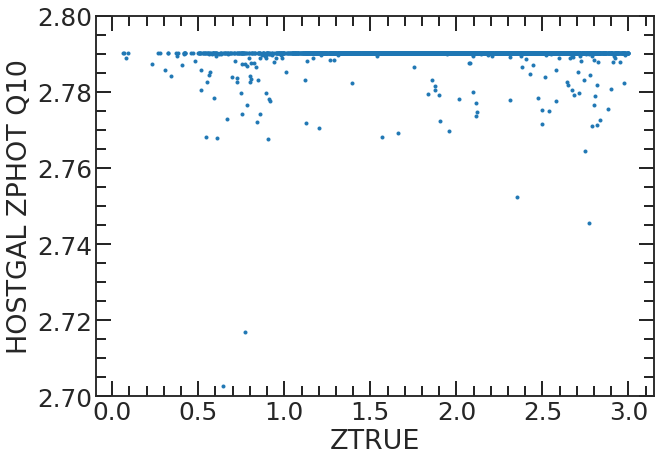

In [169]:
plt.figure(figsize=(10,7))
plt.plot(newHostlib['ZTRUE'], newHostlib['HOSTGAL_ZPHOT_Q10'],'o', ms=3);
plt.xlabel("ZTRUE")
plt.ylabel("HOSTGAL ZPHOT Q10")
plt.ylim((2.7, 2.8))

Text(0, 0.5, 'HOSTGAL ZPHOT Q10')

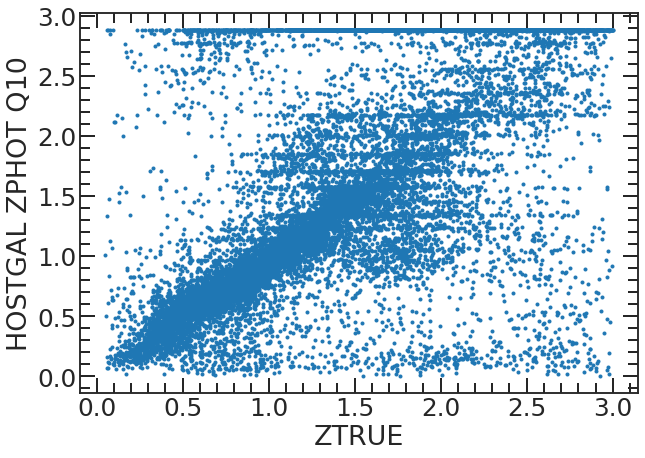

In [168]:
plt.figure(figsize=(10,7))
plt.plot(newHostlib['ZTRUE'], newHostlib['HOSTGAL_ZPHOT_Q50'],'o', ms=3);
plt.xlabel("ZTRUE")
plt.ylabel("HOSTGAL ZPHOT Q10")
#plt.ylim((2.7, 2.8))

In [ ]:
KNDF = pd.read_csv("/global/cfs/cdirs/lsst/groups/TD/SN/SNANA/SURVEYS/LSST/ROOT/PLASTICC_DEV/HOSTLIB/UNMATCHED_KN_SHIFT_GHOST.HOSTLIB", delim_whitespace=True, skiprows=11)

In [171]:
KNDF = pd.read_csv("/global/cfs/cdirs/lsst/groups/TD/SN/SNANA/SURVEYS/LSST/ROOT/PLASTICC_DEV/HOSTLIB/zquants/UNMATCHED_KN_SHIFT_GHOST.HOSTLIB", delim_whitespace=True, skiprows=11)

In [108]:
Malz_DF = pd.DataFrame({"p50":p50, "GALID":galids})

In [112]:
comb_df = Malz_DF.merge(KNDF)

Text(0, 0.5, 'ZTRUE')

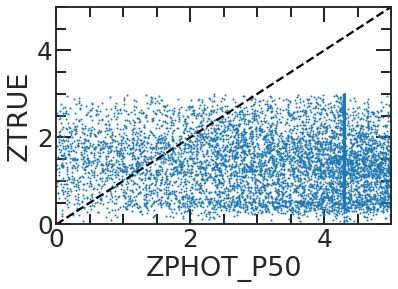

In [121]:
plt.plot(comb_df['p50'], comb_df['ZTRUE'],'o', ms=1)
plt.xlim((0, 5))
plt.ylim((0, 5))
plt.plot(np.linspace(0, 5), np.linspace(0, 5), '--', c='k')
plt.xlabel("ZPHOT_P50")
plt.ylabel("ZTRUE")

Text(0, 0.5, 'Number of Galaxies')

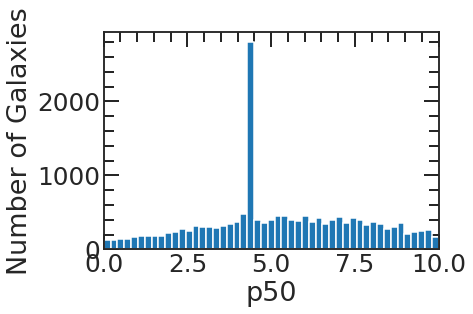

In [102]:
plt.hist(p50, bins=bins) 
plt.xlabel("p50")
plt.xlim((0, 10))
plt.ylabel("Number of Galaxies")

In [26]:
np.shape(np.concatenate(p50, axis=0))

(20000,)

In [87]:
varnames = []
df_dict = {}
for i in np.arange(9):
    qpidx = (i+1)*10
    varnames.append("HOSTGAL_ZPHOT_Q%i"%qpidx)        
    df_dict[varnames[i]] = pdfs[:, i]
df_dict['LOGP50'] = p50
df_dict['GALID'] = galids
df = pd.DataFrame(df_dict)

In [89]:
df

,ZPHOT_Q10,ZPHOT_Q20,ZPHOT_Q30,ZPHOT_Q40,ZPHOT_Q50,ZPHOT_Q60,ZPHOT_Q70,ZPHOT_Q80,ZPHOT_Q90,LOGP50,GALID
0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,2.788924,10315846307
1,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,2.566957,10315583641
2,0.0,0.0,13.415967,0.0,0.0,0.000000,0.000000,0.0,0.0,3.291289,10312559336
3,0.0,0.0,0.000000,0.0,0.0,0.000000,13.606328,0.0,0.0,3.142981,10313381246
4,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,3.371636,10313261803
...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,3.062102,10314199158
996,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,3.542279,10314689139
997,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,3.042065,10316518574
998,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,3.131964,10313671757


In [90]:
df.to_csv(dirpath + "/TESTQUANTILES_SNII.HOSTLIB", sep=' ', index=False)

In [92]:
SNII_HOSTLIB = pd.read_csv("/global/cfs/cdirs/lsst/groups/TD/SN/SNANA/SURVEYS/LSST/ROOT/PLASTICC_DEV/HOSTLIB/noheader/SNII_GHOST_PHOTOZ.HOSTLIB", delim_whitespace=True)
SNIa_HOSTLIB = pd.read_csv("/global/cfs/cdirs/lsst/groups/TD/SN/SNANA/SURVEYS/LSST/ROOT/PLASTICC_DEV/HOSTLIB/noheader/SNIa_GHOST_PHOTOZ.HOSTLIB", delim_whitespace=True)
SNIbc_HOSTLIB = pd.read_csv("/global/cfs/cdirs/lsst/groups/TD/SN/SNANA/SURVEYS/LSST/ROOT/PLASTICC_DEV/HOSTLIB/noheader/SNIbc_GHOST_PHOTOZ.HOSTLIB", delim_whitespace=True)
UNMATCHED_HOSTLIB = pd.read_csv("/global/cfs/cdirs/lsst/groups/TD/SN/SNANA/SURVEYS/LSST/ROOT/PLASTICC_DEV/HOSTLIB/noheader/UNMATCHED_COSMODC2_PHOTOZ.HOSTLIB", delim_whitespace=True)
UNMATCHED_KN_HOSTLIB = pd.read_csv("/global/cfs/cdirs/lsst/groups/TD/SN/SNANA/SURVEYS/LSST/ROOT/PLASTICC_DEV/HOSTLIB/noheader/UNMATCHED_KN_COSMODC2.HOSTLIB", delim_whitespace=True)

In [ ]:
#doing things another way for now -- just getting quants from a normal distribution
#centered on the true redshift with scale z=0.5 (probably way too high but as a first pass)

from scipy.stats import norm
bins = np.linspace(0, 1, 11)[1:-1]

varnames = []
pdf_dict = {}

pdfs = [[],[],[],[],[],[],[],[],[]]
for j in np.arange(9):
    qpidx = (j+1)*10
    varnames.append("HOSTGAL_ZPHOT_Q%i"%qpidx)      
    pdf_dict[varnames[j]] = []
        
for i in np.arange(len(SNII_HOSTLIB)):
    pdf_vals = norm(loc= SNII_HOSTLIB['ZTRUE'][i], scale=0.5).ppf(bins)
    for j in np.arange(len(pdf_vals)):
        qpidx = (j+1)*10
        varnames.append("HOSTGAL_ZPHOT_Q%i"%qpidx)      
        pdf_dict[varnames[j]].append(pdf_vals[j])

In [133]:
df_hokey = pd.DataFrame(pdf_dict)
df_hokey['GALID'] = SNII_HOSTLIB['GALID'].values

df.to_csv(dirpath + "/TESTQUANTILES_SNII.HOSTLIB", sep=' ', index=False)

['HOSTGAL_ZPHOT_Q10']